# qlanth dressed in Python

In [1]:
# when run for the first time, 
# this takes a while (maybe 10 minutes) to compile the cython code, 
# fter that, it should be much faster to import again
from sparsef1 import *
from sparsef2 import *
from sparsef3 import *
from sparsef4 import *
from sparsef5 import *
from sparsef6 import *
from sparsef7 import *
import numpy as np
from matplotlib import pyplot as plt
import inspect
import cmasher as cm
import sympy as sp
from LSJMJ_basis import LSJMJ_basis
from time import time
from fractions import Fraction

In [2]:
LSJMJ_basis.keys()

dict_keys(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])

In [3]:
iterover = [effective_ham_f1, effective_ham_f2, effective_ham_f3, effective_ham_f4, effective_ham_f5, effective_ham_f6, effective_ham_f7]
argspecs = {}
for idx, fun in enumerate(iterover):
    argspec = inspect.getfullargspec(fun)
    argvars = ', '.join(argspec.args)
    argvars = 'f%d : ' % (idx+1) + '(' + argvars + ')'
    argspecs[idx+1] = (argvars)
print('\n'.join(list(argspecs.values())))

f1 : (B02, B04, B06, B12, B14, B16, B22, B24, B26, B34, B36, B44, B46, B56, B66, S12, S14, S16, S22, S24, S26, S34, S36, S44, S46, S56, S66, α, β, γ, ζ)
f2 : (B02, B04, B06, B12, B14, B16, B22, B24, B26, B34, B36, B44, B46, B56, B66, F0, F2, F4, F6, M0, M2, M4, P2, P4, P6, S12, S14, S16, S22, S24, S26, S34, S36, S44, S46, S56, S66, T2, t2Switch, α, β, γ, ζ, σSS)
f3 : (B02, B04, B06, B12, B14, B16, B22, B24, B26, B34, B36, B44, B46, B56, B66, F0, F2, F4, F6, M0, M2, M4, P2, P4, P6, S12, S14, S16, S22, S24, S26, S34, S36, S44, S46, S56, S66, T2, T2p, t2Switch, T3, T4, T6, T7, T8, α, β, γ, ζ, σSS)
f4 : (B02, B04, B06, B12, B14, B16, B22, B24, B26, B34, B36, B44, B46, B56, B66, F0, F2, F4, F6, M0, M2, M4, P2, P4, P6, S12, S14, S16, S22, S24, S26, S34, S36, S44, S46, S56, S66, T2, T2p, t2Switch, T3, T4, T6, T7, T8, α, β, γ, ζ, σSS)
f5 : (B02, B04, B06, B12, B14, B16, B22, B24, B26, B34, B36, B44, B46, B56, B66, F0, F2, F4, F6, M0, M2, M4, P2, P4, P6, S12, S14, S16, S22, S24, S26, S34, S36, 

In [4]:
# this loop is simply to evaluate how
# quicly the sparse matrices can be computed
iterover = [effective_ham_f1, effective_ham_f2, effective_ham_f3, effective_ham_f4, effective_ham_f5, effective_ham_f6, effective_ham_f7]
for idx, fun in enumerate(iterover):
    argspec = inspect.getfullargspec(fun)
    num_parameters = len(argspec.args)
    print("f%d" %(idx+1), "num parameters = ", num_parameters)
    params = [np.random.random() for i in range(num_parameters)]
    start_time = time()
    pymat  = fun(*params)
    pyarray = pymat.toarray()
    end_time = time()
    print("time to compute python matrix = %.2f min" % ((end_time - start_time)/60.))

f1 num parameters =  31
time to compute python matrix = 0.00 min
f2 num parameters =  44
time to compute python matrix = 0.00 min
f3 num parameters =  50
time to compute python matrix = 0.01 min
f4 num parameters =  50
time to compute python matrix = 0.04 min
f5 num parameters =  50
time to compute python matrix = 0.14 min
f6 num parameters =  50
time to compute python matrix = 0.28 min
f7 num parameters =  50
time to compute python matrix = 0.17 min


## Example : Pr in LaF3

In [5]:
fHam = effective_ham_f2(
    F0=0.,    
    F2=68868.2,
    F4=50405.4,
    F6=32887.2,
    t2Switch=1,
    ζ=749.808,
    α=16.1474,
    β=-557.703,
    γ=1364.08,
    M0=1.86785,
    M2=0.56*1.86785,
    M4=0.31*1.86785,
    P2=-38.812,
    P4=0.5*38.812,
    P6=0.1*38.812,
    T2=0.,
    σSS=1,
    B02=-221.216,
    B04=737.939,
    B06=672.995,
    B22=-126.739,
    B24=420.805,
    B44=608.423,
    B26=-918.663,
    B46=-355.426,
    B66=-788.801,
    B12=0.,
    B14=0.,
    B16=0.,
    B34=0.,
    B36=0.,
    B56=0.,
    S12=0.,
    S14=0.,
    S16=0.,
    S22=0.,
    S24=0.,
    S26=0.,
    S34=0.,
    S36=0.,
    S44=0.,
    S46=0.,
    S56=0.,
    S66=0.
    )

In [8]:
energies, eigenvectors = np.linalg.eig(fHam.toarray())
energies = energies.real
the_ordering = np.argsort(energies)
energies = energies[the_ordering]
eigenvectors = eigenvectors.T[the_ordering]
energies = energies - energies[0]

In [7]:
# The eigenvectors are to be interpreted in the ordered
# basis provided by LSJMJ_basis
# for example the two largest contributions to the first eigenvector are
ground_state = eigenvectors[0]
argsorter = np.argsort(np.abs(ground_state))
basis = LSJMJ_basis["f2"]
largest_indices = argsorter[-3:]
major_basis_components = [
    (np.round(ground_state[idx],3)* 
    sp.Symbol('*|%s,J=%s,MJ=%s>' % tuple(basis[idx]))) for idx in largest_indices]
sum(major_basis_components)


0.304**|3H,J=4,MJ=-4> + 0.886**|3H,J=4,MJ=0> + 0.304**|3H,J=4,MJ=4>

## Example : Nd in LaF3

In [13]:
assoc = '''<|\[Zeta] -> 885.162, F2 -> 73037.4, F4 -> 52792.8, F6 -> 35766.8, 
 M0 -> 2.15819, M2 -> 1.20858, M4 -> 0.669038, T2 -> 291.772, 
 T3 -> 35.6931, T4 -> 59.7676, T6 -> -287.891, T7 -> 338.545, 
 T8 -> 305.252, P2 -> 210.378, P4 -> 105.189, 
 P6 -> 21.0378, \[Alpha] -> 21.3777, \[Beta] -> -589.544, \[Gamma] -> 
  1427.74, B02 -> -257.064, B04 -> 500.501, B06 -> 646.255, 
 B22 -> -50.1685, B24 -> 507.521, B26 -> -830.79, B44 -> 568.972, 
 B46 -> -408.967, B66 -> -833.618, \[Epsilon] -> -4.45374, nE -> 3|>'''
# assoc = assoc.replace('\\[Zeta]', 'ζ')
# assoc = assoc.replace('\\[Alpha]', 'α')
# assoc = assoc.replace('\\[Beta]', 'β')
# assoc = assoc.replace('\\[Gamma]', 'γ')
# assoc = assoc.replace('\\[Epsilon]', 'ε')
# assoc = assoc.replace('\n', ' ')
# assoc = assoc.replace('->', '":')
# assoc = assoc.replace('<|', '{"')
# assoc = assoc.replace('|>', '}')
# assoc = assoc.replace(' ', '')
# assoc = assoc.replace(',', ', "') 
# params = eval(assoc)
# params['σSS'] = 1
# params['F0']  = 0
# params['T11'] = 0
# params['T2p'] = 0
# params['B12'] = 0
# params['B14'] = 0
# params['B16'] = 0
# params['B34'] = 0
# params['B36'] = 0
# params['B56'] = 0
# params['S12'] = 0
# params['S14'] = 0
# params['S16'] = 0
# params['S22'] = 0
# params['S24'] = 0
# params['S26'] = 0
# params['S34'] = 0
# params['S36'] = 0
# params['S44'] = 0
# params['S46'] = 0
# params['S56'] = 0
# params['S66'] = 0
# params['t2Switch'] = 1
# del params['ε']
# del params['nE']
# turn this into a function that can be used
def from_assoc_to_dict(assoc):
    assoc = assoc.replace('\\[Zeta]', 'ζ')
    assoc = assoc.replace('\\[Alpha]', 'α')
    assoc = assoc.replace('\\[Beta]', 'β')
    assoc = assoc.replace('\\[Gamma]', 'γ')
    assoc = assoc.replace('\\[Epsilon]', 'ε')
    assoc = assoc.replace('\n', ' ')
    assoc = assoc.replace('->', '":')
    assoc = assoc.replace('<|', '{"')
    assoc = assoc.replace('|>', '}')
    assoc = assoc.replace(' ', '')
    assoc = assoc.replace(',', ', "')
    params = eval(assoc)
    params['σSS'] = 1
    params['F0']  = 0
    # params['T11'] = 0
    params['T2p'] = 0
    params['B12'] = 0
    params['B14'] = 0
    params['B16'] = 0
    params['B34'] = 0
    params['B36'] = 0
    params['B56'] = 0
    params['S12'] = 0
    params['S14'] = 0
    params['S16'] = 0
    params['S22'] = 0
    params['S24'] = 0
    params['S26'] = 0
    params['S34'] = 0
    params['S36'] = 0
    params['S44'] = 0
    params['S46'] = 0
    params['S56'] = 0
    params['S66'] = 0
    params['t2Switch'] = 1
    del params['ε']
    del params['nE']  
    return params
params = from_assoc_to_dict(assoc)  

In [14]:
fHam = effective_ham_f3(**params) 

In [15]:
energies, eigenvectors = np.linalg.eig(fHam.toarray())
energies = energies.real
the_ordering = np.argsort(energies)
energies = energies[the_ordering]
eigenvectors = eigenvectors.T[the_ordering]
energies = energies - energies[0]

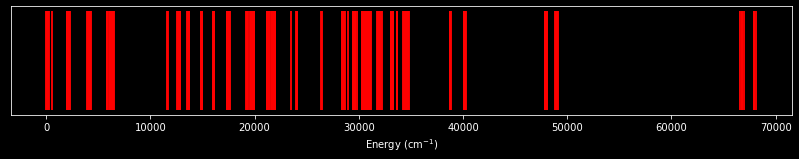

In [32]:
# set style to dark
plt.style.use('dark_background')
plt.figure(figsize=(14,2))
# make a short vertical lines at each energy
plt.vlines(energies, 0, 1, color='r')
# disable yticks
plt.yticks([])
plt.xlabel('Energy (cm$^{-1}$)')
plt.show()

In [16]:
# The eigenvectors are to be interpreted in the ordered
# basis provided by LSJMJ_basis
# for example the two largest contributions to the first eigenvector are
ground_state = eigenvectors[0]
argsorter = np.argsort(np.abs(ground_state))
basis = LSJMJ_basis["f3"]
largest_indices = argsorter[-3:]
major_basis_components = [
    (np.round(ground_state[idx],3)* 
    sp.Symbol('*|%s,J=%s,MJ=%s>' % tuple(basis[idx]))) for idx in largest_indices]
sum(major_basis_components)


0.563**|4I,J=9/2,MJ=-5/2> - 0.428**|4I,J=9/2,MJ=-9/2> + 0.66**|4I,J=9/2,MJ=3/2>